In [1]:
from specialist_data import get_stage

X_train, X_test, y_train, y_test = get_stage('adult')
print(len(X_train), len(X_test))

12059 5940


/home/arthur/projects/curriculum-learning/models/transform/environmental.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['level'] = self.level


In [2]:
from sklearn.ensemble import RandomForestClassifier
import pickle



clf = RandomForestClassifier(max_depth=100, random_state=42)
clf = clf.fit(X_train, y_train)

filename = 'random_forest_classifier.sav'
pickle.dump(clf, open(filename, 'wb'))

0.8823232323232323


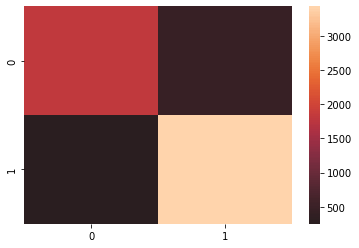

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cfl = pickle.load(open(filename, 'rb'))
result = cfl.score(X_test, y_test)
print(result)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True)
plt.show()

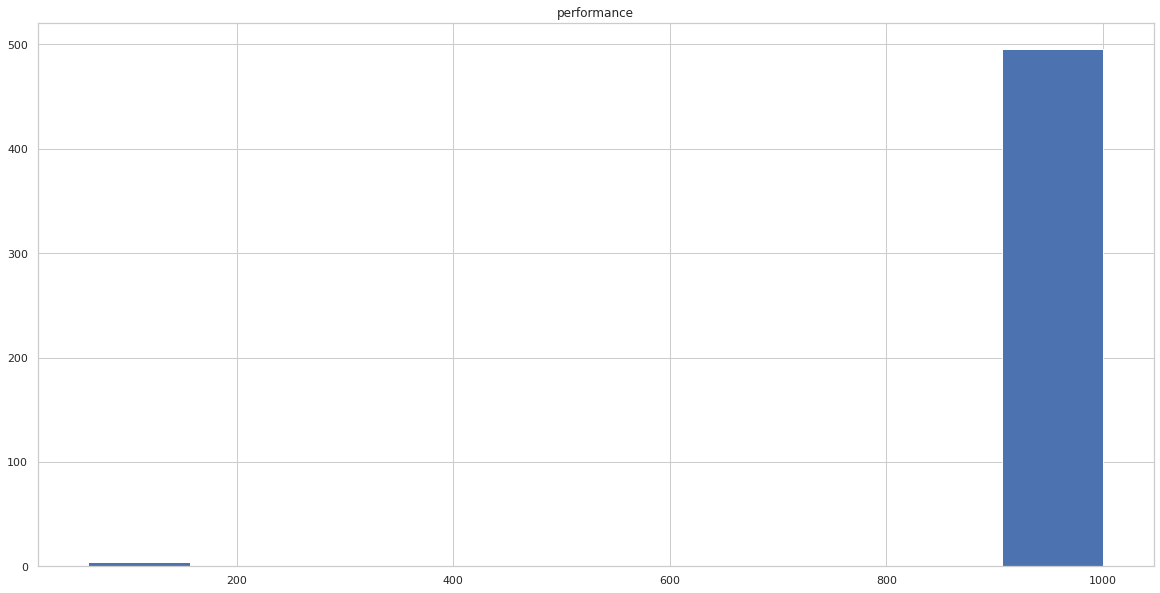

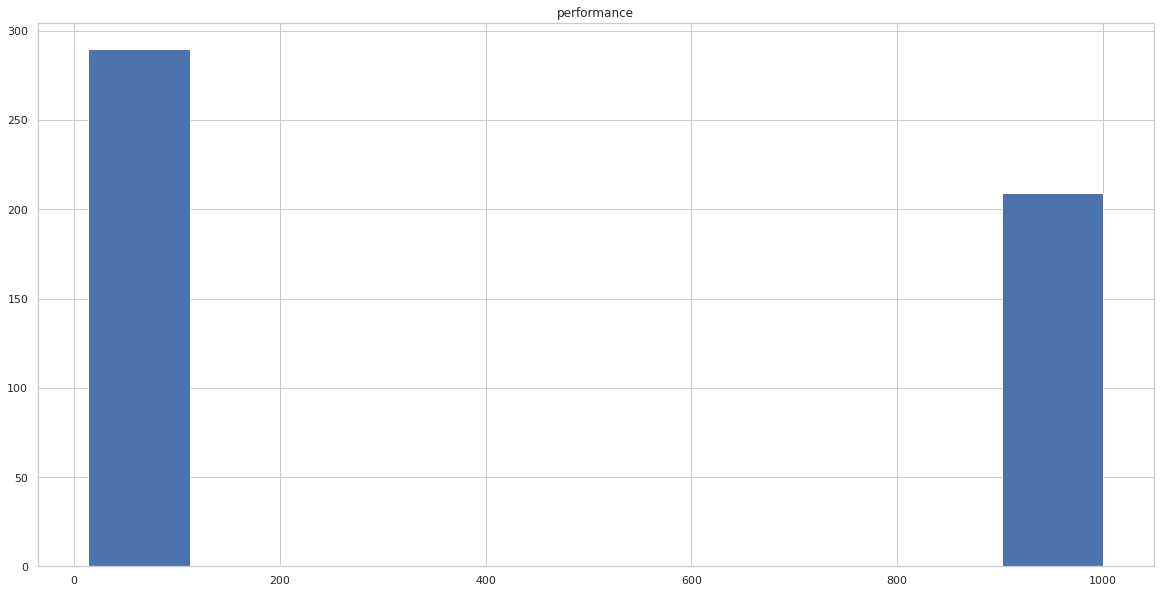

In [5]:
from graph_utils import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

good = pd.read_csv(f'../../data/xdpole/specialist/random_forest/lifetime/s10_good_specialist.csv', index_col='Unnamed: 0')
bad = pd.read_csv(f'../../data/xdpole/specialist/random_forest/lifetime/s10_bad_specialist.csv', index_col='Unnamed: 0')

generate_hist(good, 'performance')
generate_hist(bad, 'performance')

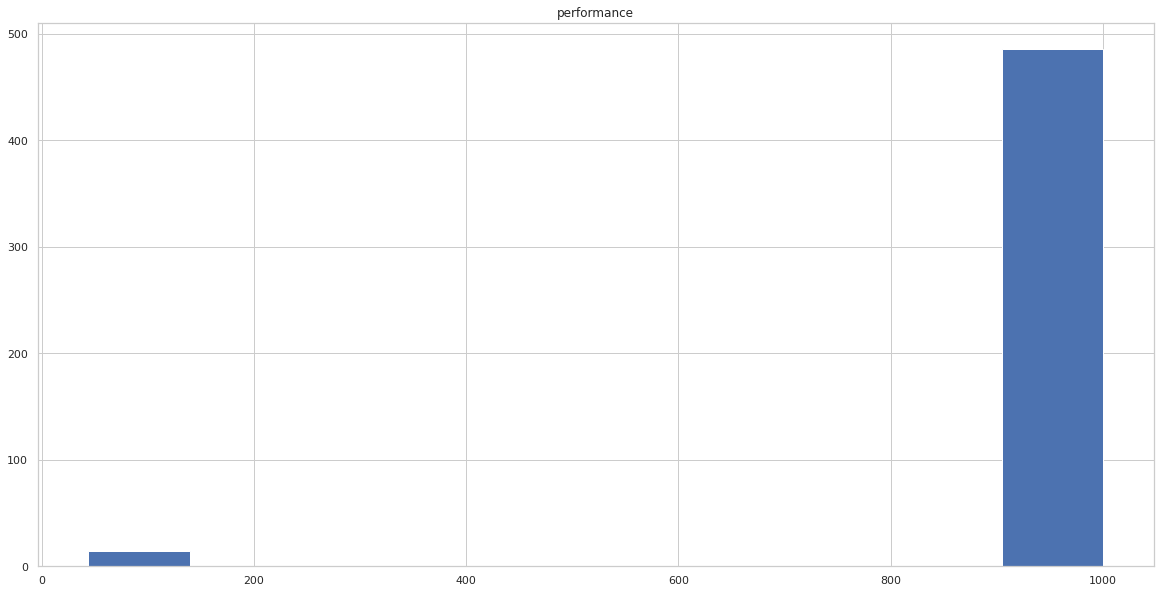

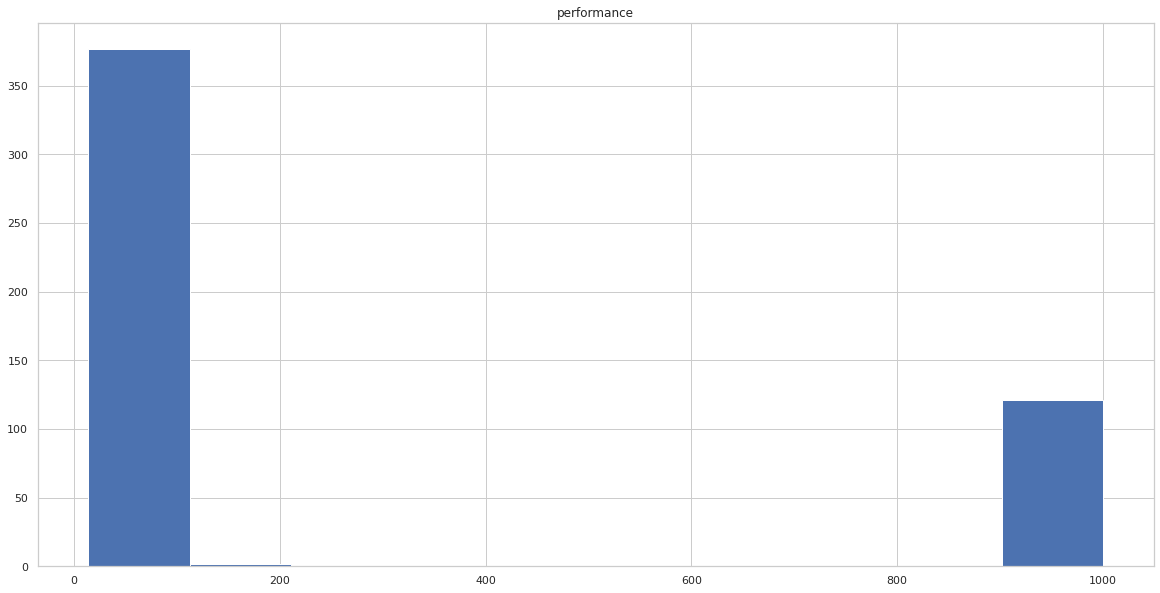

In [6]:
good = pd.read_csv(f'../../data/xdpole/specialist/random_forest/adult/s10_good_specialist.csv', index_col='Unnamed: 0')
bad = pd.read_csv(f'../../data/xdpole/specialist/random_forest/adult/s10_bad_specialist.csv', index_col='Unnamed: 0')

generate_hist(good, 'performance')
generate_hist(bad, 'performance')